# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Boston Housing dataset - again! 

The dataset is available in the file `'boston.csv'`. 

- Import the dataset and print its `.head()` and dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Boston housing dataset 
df = pd.read_csv('boston.csv') 

# Print the first five rows 
display(df.head())

# Print the dimensions of data
print(df.shape)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(506, 15)


## Identify features and target data 

In this lab, we will use three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`: 

#### Features
- `'RM'` is the average number of rooms among homes in the neighborhood 
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor) 
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood 

#### Target
- `MEDV`',the median value of the home 

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents for validity 

In [3]:
# Features and target data
target = df['medv']
features = df[['rm', 'lstat', 'ptratio']]
display(target.head())
display(features.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

,rm,lstat,ptratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

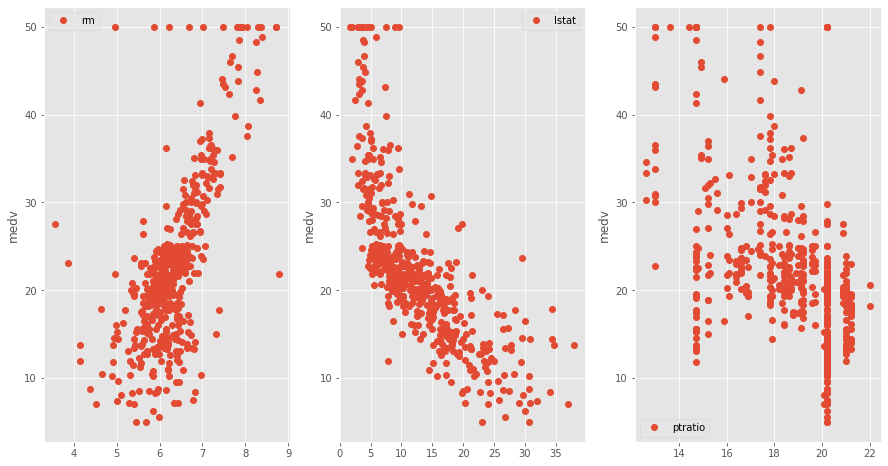

In [24]:
plt.figure(figsize=(15,8))
for i, col in enumerate(features.columns):
    plt.subplot(131+i)
    plt.plot(features[col], target, linestyle='', marker='o', label=col)
    plt.legend()
    plt.ylabel('medv')
    
plt.show()

In [25]:
# rm and lstat appear to have a pretty strong positive and negative correlation, respectively, with medv.
# ptratio has a loosely negative association.

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return the r-squared score and MSE for two equal-sized arrays for the given true and predicted values 

In [27]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.metrics.mean_squared_error import mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    
    # Calculate the mean squared error between 'y_true' and 'y_predict'
    mse = mean_squared_error(y_true, y_predict)
    
    # Return the score
    return {'r2':r2, 'mse':mse}
    


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.4719999999999998]

{'r2': 0.9228556485355649, 'mse': 0.4719999999999998}

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [28]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [29]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.47097115950374013, 38.795686274509805]  - R2, MSE

{'r2': 0.47097115950374013, 'mse': 38.795686274509805}

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate MSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

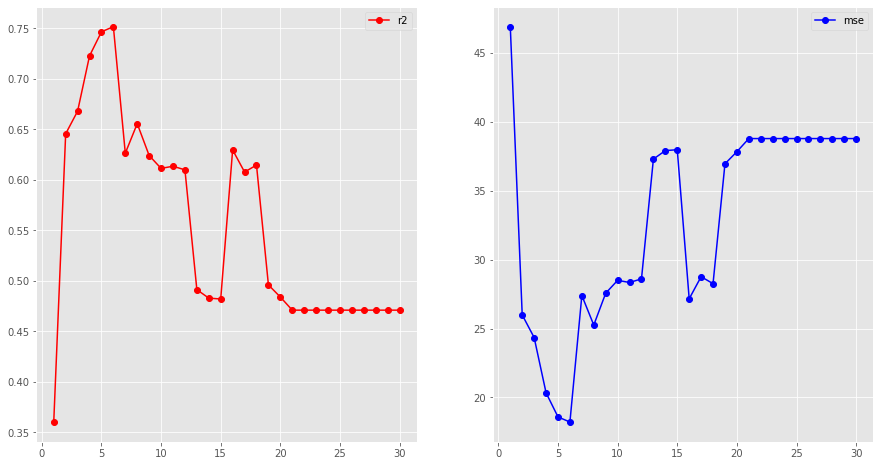

In [36]:
depths = np.linspace(1, 30, 30)
scores = []
for d in depths:
    regressor = DecisionTreeRegressor(max_depth=d, random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    scores.append(performance(y_test, y_pred))
    
r2 = [x['r2'] for x in scores]
mse = [x['mse'] for x in scores]

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(depths, r2, 'r', label='r2', linestyle='-', marker='o')
plt.legend()
plt.subplot(122)
plt.plot(depths, mse, 'b', label='mse', linestyle='-', marker='o')
plt.legend()
plt.show()

In [ ]:
#r2 peaks at ~6, mse min at ~6. Ideal depth ~5-6.

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

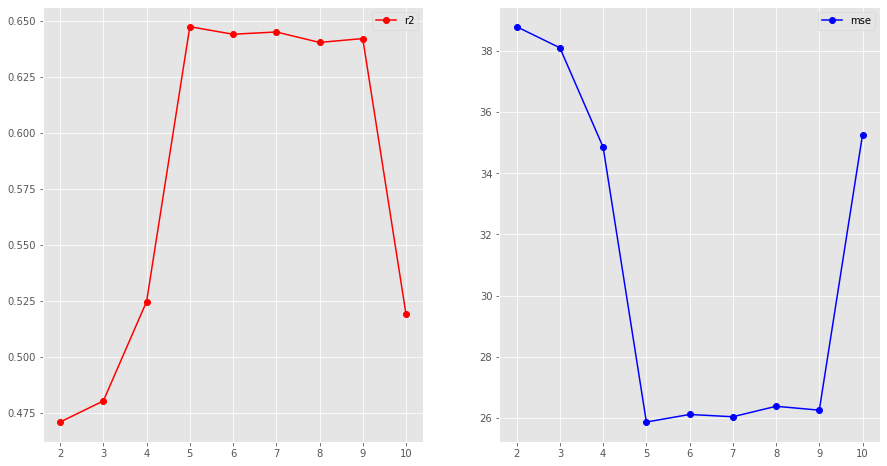

In [39]:
mins = np.linspace(2, 10, 9)
scores = []
for d in mins:
    regressor = DecisionTreeRegressor(min_samples_split=int(d), random_state=45)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    scores.append(performance(y_test, y_pred))
    
r2 = [x['r2'] for x in scores]
mse = [x['mse'] for x in scores]

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.plot(mins, r2, 'r', label='r2', linestyle='-', marker='o')
plt.legend()
plt.subplot(122)
plt.plot(mins, mse, 'b', label='mse', linestyle='-', marker='o')
plt.legend()
plt.show()

In [ ]:
# r2 peaks between 5-9, mse achieves min between 5-9. Best min appears to be ~5.

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [40]:
regressor = DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=45)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = performance(y_test, y_pred)
score

{'r2': 0.7515894043185498, 'mse': 18.216888758430127}

In [ ]:
# r2 score up from .47 vanilla model to .75; mse down from 38.8 vanilla model to 18.2. 
# Huge improvements.

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like max-features to find a more optimal version of the model 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Boston Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 